<a href="https://colab.research.google.com/github/ssyeon2/kt-aivle/blob/main/March/03.02/SEN/DL(Mnist%2C%20Fashion)" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as np

import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

id = 53822
다음 그림은 숫자 5 입니다.


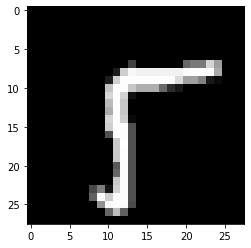

In [ ]:
id = rd.randrange(0, 60000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap = 'gray')    # imshow는 array에 색을 채워라
plt.show()

## 데이터 전처리

* reshape

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

* min-max scaling

In [ ]:
min_n = train_x.min()
max_n = test_x.max()

test_x = (test_x - min_n) / (max_n - min_n)
train_x = (train_x - min_n) / (max_n - min_n)

In [ ]:
train_x.min(), test_x.max()

(0.0, 1.0)

* One-Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
class_n = len(set(train_y))

In [ ]:
train_y = to_categorical(train_y , class_n)
test_y = to_categorical(test_y , class_n)

In [ ]:
train_x.shape, train_y.shape, test_x.shape

### 모델링
* Sequential()
* hidden layer 2개 이상

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 모델 선언
model = keras.models.Sequential()

# 모델 블록 조립
model.add(keras.layers.Input(shape=(train_x.shape[1],)))
model.add(keras.layers.Dense(256, 'relu'))
model.add(keras.layers.Dense(64, 'relu'))
model.add(keras.layers.Dense(16, 'relu'))
model.add(keras.layers.Dense(class_n, 'softmax'))

# model 컴파일
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
              optimizer = 'adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   patience = 5,
                   min_delta = 0,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
model.fit(train_x, train_y, epochs = 1000, verbose = 1,
              callbacks = [es], validation_split = 0.2)

In [ ]:
model.evaluate(test_x, test_y)

In [ ]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

## Fashion Mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape, y_train.shape, x_test.shape

* min-max scaling

In [ ]:
min_n = x_train.min()
max_n = x_test.max()

x_train = (x_train - min_n)/ (max_n - min_n)
x_test = (x_test-min_n)/(max_n - min_n)

In [ ]:
x_train.min(), x_test.max()

* One-Hot encoding

In [ ]:
class_n = len(set(y_train))

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, class_n)
y_test = to_categorical(y_test, class_n)

In [ ]:
x_train.shape, x_test.shape, y_train.shape

#### 모델링
* Functional()
* Flatten()

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 모델 layer 엮기
il = keras.layers.Input(shape=(28,28))
fl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(256, 'relu')(fl)
hl = keras.layers.Dense(128, 'relu')(hl)
hl = keras.layers.Dense(32, 'relu')(hl)
ol = keras.layers.Dense(class_n, 'softmax')(hl)


# 모델 input, output 지정
model = keras.models.Model(il, ol)

# 모델 컴파일
model.compile(loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'],
              optimizer = 'adam')

# 모델 요약
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_loss',
                   patience = 5,
                   min_delta = 0,
                   verbose = 1,
                   restore_best_weights = True)

In [ ]:
model.fit(x_train, y_train, verbose = 1, epochs=1000,
          validation_split = 0.2, callbacks = [es])

In [ ]:
print(model.evaluate(x_train, y_train))
print(model.evaluate(x_test, y_test))

In [ ]:
from sklearn.metrics import accuracy_score
pred_test = model.predict(x_test).argmax(axis = 1)
pred_train = model.predict(x_train).argmax(axis=1)


print('train 정확도 : {:2f}%'.format(accuracy_score(y_train.argmax(axis = 1), pred_train)))
print('test 정확도 : {:2f}%'.format(accuracy_score(y_test.argmax(axis=1), pred_test)))